## Pandas and Matplotlib

In this project we make some visualizations with using Matplotlib. The dataset contains tweets about the presidential candidates.

In [2]:
import pandas as pd

tweets = pd.read_csv("Data/tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [3]:
# create a function finding out which candidate names occur in a tweet text.

def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    
    if "trump" in text or "donald" in text:
        candidates.append("trump")
        
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    
    return ",".join(candidates)

In [4]:
# generate a new column shows which candidates the tweet mentions

tweets["candidate"] = tweets.apply(get_candidate, axis=1)
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text,candidate
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...,"clinton,sanders"
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...,trump
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...,trump
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...,trump
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ...",trump


### Making a bar plot

We will make a bar plot of how many tweets mentioned each candidate.
We’ll pass in a list of numbers from 0 to the number of unique values in the candidate column as the x-axis input, and the counts as the y-axis input. plt.bar() method automatically creates a Figure object and an Axes object.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

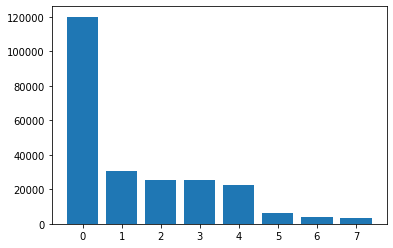

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [6]:
counts = tweets['candidate'].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)

### widely used methods in the pyplot module

* plt.bar — creates a bar chart.
* plt.boxplot — makes a box and whisker plot.
* plt.hist — makes a histogram.
* plt.plot — creates a line plot.
* plt.scatter — makes a scatter plot.

### Customizing plots

We will search for the time that a tweet sent and the time that spesific user account created.
More user accounts created recently may imply manipulation. Let's make a histogram.

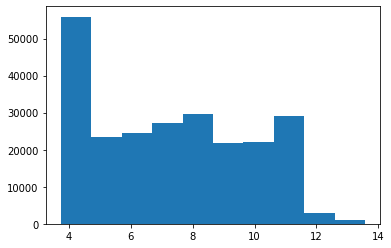

In [7]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now()-x).total_seconds() / 3600 / 24 / 365 )
plt.hist(tweets["user_age"])
plt.show()

### Adding Labels

A title and labels can be added to the plot. The methods are:
    
* plt.title — adds a title to the plot.
     
* plt.xlabel — adds an x-axis label.
    
* plt.ylabel — adds a y-axis label.
    

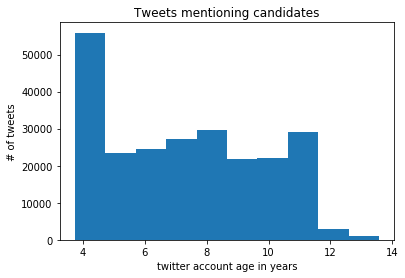

In [8]:
# We will make the same histogram above with labels. 

plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

In [9]:
print(tweets["user_age"])

0          8.223142
1          7.117344
2          7.320432
3          5.970538
4         10.883534
            ...    
237475     6.129012
237476     4.402507
237477     8.831440
237478     8.050429
237479    10.237574
Name: user_age, Length: 237480, dtype: float64


### Stacked histogram

A stacked histogram can break it down by candidate. 
We need pandas series for each candidate to make a stacked histogram.   

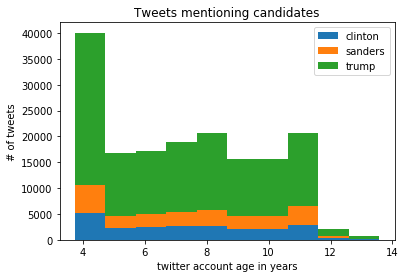

In [10]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]

plt.hist([cl_tweets,
          sa_tweets,
          tr_tweets],
        stacked=True,
        label=["clinton","sanders","trump"])

plt.legend() # draw a legend in the top right corner.

plt.title("Tweets mentioning candidates")
plt.xlabel("twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

### Annotations 

plt.annotate() method add annotations to the plot. Here are the parameters for the method:

* xy — determines the x and y coordinates where the arrow should start.
* xytext — determines the x and y coordinates where the text should start.
* arrowprops — specify options about the arrow, such as color.
    
    

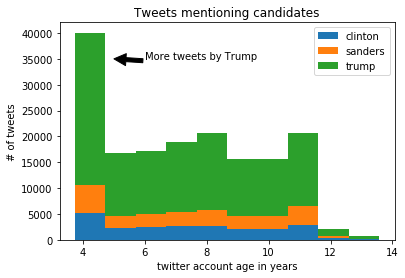

In [11]:
plt.hist([cl_tweets,
          sa_tweets,
          tr_tweets],
        stacked=True,
        label=["clinton","sanders","trump"])

plt.legend() # draw a legend in the top right corner.

plt.title("Tweets mentioning candidates")
plt.xlabel("twitter account age in years")
plt.ylabel("# of tweets")

plt.annotate("More tweets by Trump", xy=(5,35000), xytext=(6,35000),
            arrowprops=dict(facecolor='black'))

plt.show()

### Multiple Subplots

plt.bar and plt.hist methods automatically create a Figure object and an Axes object. However, we can create these objects, as well. We can do this when we make multiple plots. For example, plt.subplots(nrows=2, ncols=2) method generates 2x2 grid of Axes objects.

We’ll generate 4 plots that show the amount of the colors red and blue in the Twitter background colors of users tweeting about candidates.

In [12]:
import matplotlib.colors as colors

# extracting how much red and blue is in tweeters' profiles.
tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

Figure(432x288)
<class 'numpy.ndarray'>


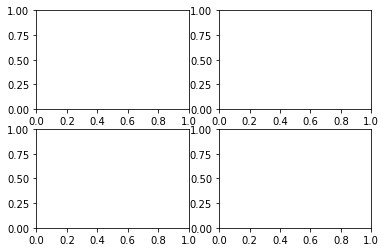

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
print(fig)
print(type(axes)) # The axes are returned in a 2×2 NumPy array.

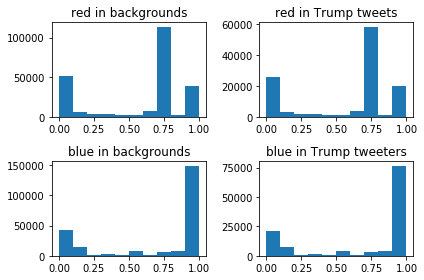

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)

ax_0, ax_1, ax_2, ax_3 = axes.flat # we can extract each axes object by using flat property.

ax_0.hist(tweets["red"])
ax_0.set_title("red in backgrounds") # Set a title for the axes.

ax_1.hist(tweets["red"][tweets["candidate"]=="trump"].values)
ax_1.set_title("red in Trump tweets")

ax_2.hist(tweets["blue"])
ax_2.set_title("blue in backgrounds")

ax_3.hist(tweets["blue"][tweets["candidate"]=="trump"].values)
ax_3.set_title("blue in Trump tweeters")

plt.tight_layout() # to reduce padding in the graphs and fit all the elements.
plt.show()

### Removing common background colors

three most common background colors will be removed.  

In [15]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
           ...  
A5DECF         1
131411         1
780505         1
40D0E0         1
3D522B         1
Name: user_bg_color, Length: 6970, dtype: int64

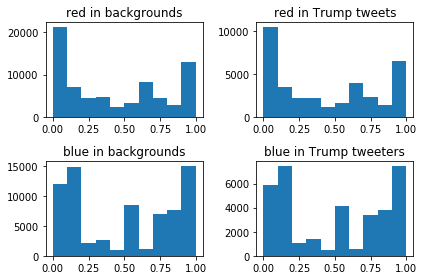

In [16]:
tweets_selected = tweets[~tweets["user_bg_color"].isin(["C0DEED","000000", "F5F8FA"])]

def create_plot(data):
    
    fig, axes = plt.subplots(nrows=2, ncols=2)

    ax_0, ax_1, ax_2, ax_3 = axes.flat # we can extract each axes object by using flat property.

    ax_0.hist(data["red"])
    ax_0.set_title("red in backgrounds") # Set a title for the axes.

    ax_1.hist(data["red"][tweets["candidate"]=="trump"].values)
    ax_1.set_title("red in Trump tweets")

    ax_2.hist(data["blue"])
    ax_2.set_title("blue in backgrounds")

    ax_3.hist(data["blue"][tweets["candidate"]=="trump"].values)
    ax_3.set_title("blue in Trump tweeters")

    plt.tight_layout() # to reduce padding in the graphs and fit all the elements.
    plt.show()
                         
create_plot(tweets_selected)

We can say that the distribution of blue and red in background colors for users that tweeted about Trump is almost identical to the distribution for all tweeters.

### Group the tweets by candidate, plot the Mean and Standard Deviation of a column, resize the figure

We will group the tweets by candidate, plot the Mean and Standard Deviation of polarity column which shows sentiment scores of each tweet and increase the size of the figure.

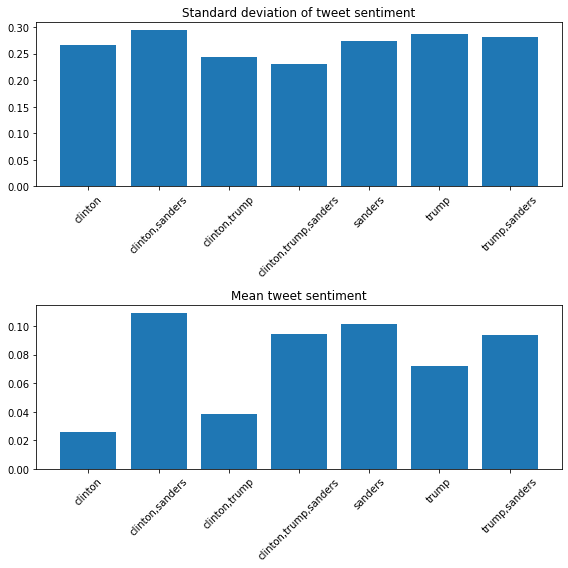

In [24]:
tweets_gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax_0, ax_1 = axes.flat

std = tweets_gr["polarity"]["std"].iloc[1:] #get rid of the first row which has empty index
mean = tweets_gr["polarity"]["mean"].iloc[1:] #get rid of the first row which has empty index

ax_0.bar(range(len(std)), std) 
ax_0.set_xticks(range(len(std))) # may not show first x- label if not written 
ax_0.set_xticklabels(std.index, rotation = 45) # put the x -labels and rotate them
ax_0.set_title("Standard deviation of tweet sentiment")

ax_1.bar(range(len(mean)), mean)
ax_1.set_xticks(range(len(mean)))
ax_1.set_xticklabels(std.index, rotation=45)
ax_1.set_title("Mean tweet sentiment")

plt.tight_layout() 
plt.show()

### Side by side bar plot

We’ll categorize the tweets as short, medium, and long tweets. Then, we’ll count up how many tweets mentioning each candidate fall into each category. Then, we’ll generate a bar plot with bars for each candidate side by side.

In [35]:
def tweet_length(text):
    if len(text) <100:
        return "short"
    elif 100<=len(text) <= 135:
        return "medium"
    else:
        return "long"
    
tweets["tweet_length"] = tweets["text"].apply(tweet_length)

tl= {}
# tlr={}

for candidate in ["clinton","sanders","trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"]== candidate].value_counts()
    # tlr[candidate] = tweets.loc[tweets["candidate"].str.contains(candidate), "tweet_length"].value_counts()  # This can also be used.

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

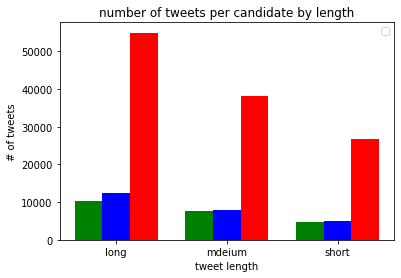

In [48]:
fig, ax = plt.subplots()
width = 0.5  # width for each bar

x = np.array(range(0,6,2))

ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x+width, tl["sanders"], width, color='b')
ax.bar(x+(width*2), tl["trump"], width, color='r')

ax.set_ylabel("# of tweets")
ax.set_xlabel("tweet length")
ax.set_title("number of tweets per candidate by length")
ax.set_xticks(x+width)  # to move the tick labels to the center of each category area.
ax.set_xticklabels(("long","mdeium","short"))

plt.show

### Geographic Data with Basemap

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os 

os.environ["PROJ_LIB"] = "C:\\Anaconda3\\pkgs\\proj4-5.2.0-ha925a31_1\\Library\\share"
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


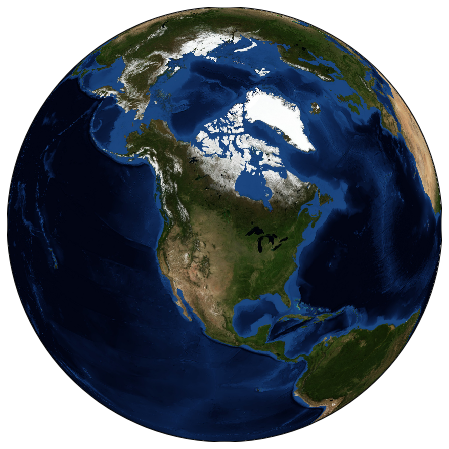

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)
plt.show()